# Stochastic Block Models (SBM)

Let's imagine that we have $100$ students, each of whom can go to one of two possible schools: school one or school two. Our network has $100$ nodes, and each node represents a single student. The edges of this network represent whether a pair of students are friends. Intuitively, if two students go to the same school, the probably have a higher chance of being friends than if they do not go to the same school. If we were to try to characterize this using an ER random network, we would run into a problem: we have no way to capture the impact that school has on friendships. Intuitively, there must be a better way!

The Stochastic Block Model, or SBM, captures this idea by assigning each of the $n$ nodes in the network to one of $K$ communities. A **community** is a group of nodes within the network. In our example case, the communities would represent the schools that students are able to attend. We use $K$ here to just denote an integer greater than $1$ (for example, in the school example we gave above, $K$ is $2$) for the number of *possible* communities that nodes could be members of. In an SBM, instead of describing all pairs of nodes with a fixed probability like with the ER model, we instead describe properties that hold for edges between *pairs of communities*. In our example, what this means is that if two students go to school one, the probability that they are friends might be different than if the two students went to school two, or if one student went to school one and the other to school two. Let's take a look at what a realization of this setup we have described might look like:

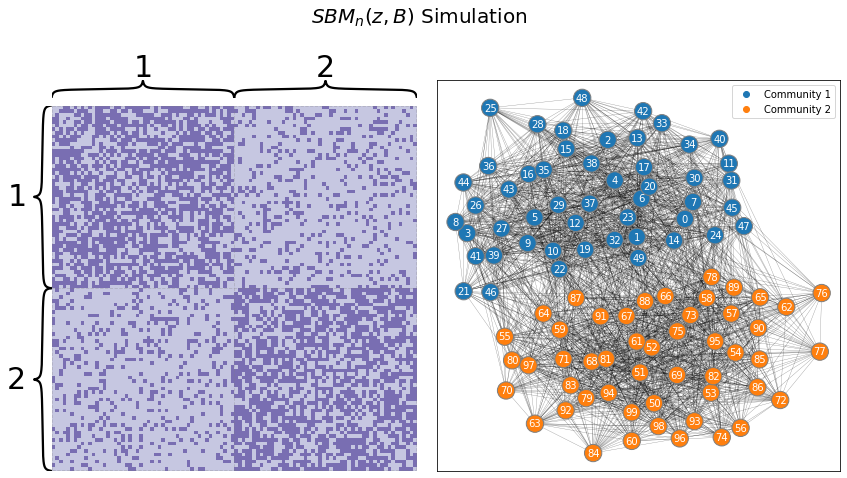

In [1]:
from graphbook_code import draw_multiplot
from graspologic.simulations import sbm

ns = [50, 50]  # network with 50 nodes
B = [[0.6, 0.2], [0.2, 0.6]]  # probability of an edge existing is .3

# sample a single simple adjacency matrix from ER(50, .3)
A = sbm(n=ns, p=B, directed=False, loops=False)
ys = [1 for i in range(0, 50)] + [2 for i in range(0, 50)]
draw_multiplot(A, labels=ys, title="$SBM_n(z, B)$ Simulation");

## Defining the paramaters of an SBM random network

### The community assignment vector assigns nodes in the random network to communities

To describe an SBM random network, we proceed very similarly to an ER random network, with a twist. An SBM random network has a parameter, $\vec z$, which has a single element for each of the node. We call $\vec z$ the **community assignment vector**, which means that for each node of our random network, $z_i$ tells us which community the node is in. To state this another way, $\vec z$ is a vector where each element $z_i$ can take one of $K$ possible values, where $K$ is the total number of communities in the network. For example, if we had an SBM random network with four nodes in total, and two total communities, each element $z_i$ can be either $1$ or $2$. If the first two nodes were in community $1$, and the second two in community $2$, we would say that $z_1 = 1$, $z_2 = 1$, $z_3 = 2$, and $z_4 = 2$, which means that $\vec z$ looks like:

\begin{align*}
    \vec z^\top &= \begin{bmatrix}1 & 1 & 2 & 2\end{bmatrix}
\end{align*}

### The block matrix defines the edge existence probabilities between communities in the random network

The other parameter for an SBM random network is called the block matrix, for which we will use the capital letter $B$. If there are $K$ communities in the SBM random network, then $B$ is a $K \times K$ matrix, with one entry for each pair of communities. For instance, if $K$ were two like above, $B$ would be a $2 \times 2$ matrix, and would look like this:
\begin{align*}
    B &= \begin{bmatrix}
        b_{11} & b_{12} \\ b_{21} & b_{22}
    \end{bmatrix}
\end{align*}
Each of the entries of $B$, which we denote as $b_{kl}$ in the above matrix, is a probability of an edge existing between a node in community $k$ and a node in community $l$. 

Fortunately, we can also think of this formulation of a random network using coin flips. In our mini example above, if node $1$ is in community $1$ (since $z_1 = 1$) and node $2$ is in community $1$ (since $z_2 = 1$), we have a weighted coin which has a probability $b_{11}$ (the first row, first column of the block matrix above) of landing on heads, and a $1 - b_{11}$ chance of landing on tails. An edge between nodes one and two exists if the weighted coin lands on heads, and does not exist if that weighted coin lands on tails. If we wanted to describe an edge between nodes one and three instead, note that $z_3 = 2$. Therefore, we use the entry $b_{12}$ as the probability of obtaining a heads for the weighted coin we flip this time. In the general case, to use the block matrix to obtain the probability of an edge $(i, j)$ existing between any pair of nodes $i$ and $j$ in our network, we will flip a coin with probability $b_{z_i z_j}$, where $z_i$ is the community assignment for the $i^{th}$ node and $z_j$ is the community assignment for the $j^{th}$ node.

If $\mathbf A$ is a random network which is an $SBM_n(\vec z, B)$ with $n$ nodes, the community vector $\vec z$, and the block matrix $B$, we say that $\mathbf A$ is an $SBM_n(\vec z, B)$ random network.


### How do we simulate realizations of $SBM_n(\vec z, B)$ random networks?

The procedure below will produce for us a network $A$, which has nodes and edges, where the underlying random network $\mathbf A$ is an $SBM_n(\vec z, B)$ random network:

```{admonition} Simulating a realization from an $SBM_n(\vec z, B)$ random network
1. Determine a community assignment vector, $\vec z$, for each of the $n$ nodes. Each node should be assigned to one of $K$ communities.
2. Determine a block matrix, $B$, for each pair of the $K$ communities.
3. For each pair of communities $k$ and $l$, obtain a weighted coin (which we will call the $(k,l)$ coin) which as a $b_{kl}$ chance of landing on heads, and a $1 - b_{kl}$ chance of landing on tails.
4. For each pair of nodes $i$ and $j$:
    * Denote $z_i$ to be the community assignment of node $i$, and $z_j$ to be the community assignment of node $j$.
    * Flip the $(z_i, z_j)$ coin, and if it lands on heads, the corresponding entry $a_{ij}$ in the adjacency matrix is $1$. If it lands on tails, the corresponding entry $a_{ij}$ in the adjacency matrix is $0$.
5. The adjacency matrix we produce, $A$, is a realization of an $SBM_n(\vec z, B)$ random network.
```

We just covered a lot of intuition! This intuition will come in handy later, but let's take a break from the theory by working through an example. Let's use the school example we started above. Say we have $100$ students, and we know that each student goes to one of two possible schools. Remember that we already know the community assignment vector $\vec{z}$ ahead of time. We don't really care too much about the ordering of the students for now, so let's just assume that the first $50$ students all go to the first school, and the second $50$ students all go to the second school. 

```{admonition} Thought Exercise

Before you read on, try to think to yourself about what the node-assignment vector $\vec z$ looks like.
```

Next, let's plot what $\vec z$ look like:

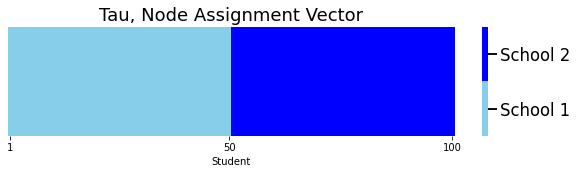

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

def plot_tau(tau, title="", xlab="Node"):
    cmap = matplotlib.colors.ListedColormap(["skyblue", 'blue'])
    fig, ax = plt.subplots(figsize=(10,2))
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap((tau - 1).reshape((1,tau.shape[0])), cmap=cmap,
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False)
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        cbar.set_ticks([0.25, .75])
        cbar.set_ticklabels(['School 1', 'School 2'])
        ax.set(xlabel=xlab)
        ax.set_xticks([.5,49.5,99.5])
        ax.set_xticklabels(["1", "50", "100"])
        cbar.ax.set_frame_on(True)
    return

n = 100  # number of students

# tau is a column vector of 150 1s followed by 50 2s
# this vector gives the school each of the 300 students are from
tau = np.vstack((np.ones((int(n/2),1)), np.full((int(n/2),1), 2)))

plot_tau(tau, title="Tau, Node Assignment Vector",
        xlab="Student")

So as we can see, the first $50$ students are from the first school, and the second $50$ students are from second school.

Let's assume that the students from the first school are better friends in general than the students from the second school, so we'll say that the probability of two students who both go to the first school being friends is $0.5$, and the probability of two students who both go to school $2$ being friends is $0.3$. Finally, let's assume that if one student goes to the first school and the other student goes to school $2$, that the probability that they are friends is $0.2$.
 
```{admonition} Thought Exercise

Before you read on, try to think to yourself about what the block matrix $B$ looks like.
```

 Next, let's look at the block matrix $B$: 

In [3]:
K = 2  # 2 communities in total
# construct the block matrix B as described above
B = [[0.6, 0.2], 
     [0.2, 0.4]]

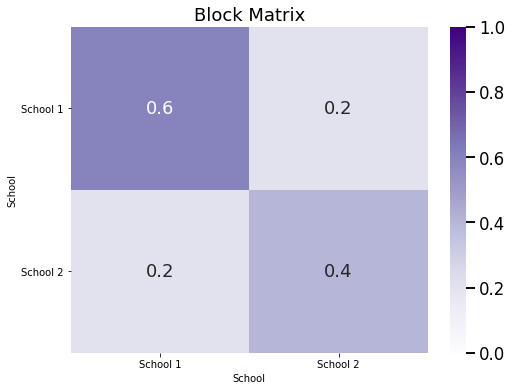

In [4]:

def plot_block(X, title="", blockname="School", blocktix=[0.5, 1.5],
               blocklabs=["School 1", "School 2"]):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap(X, cmap="Purples",
                        ax=ax, cbar_kws=dict(shrink=1), yticklabels=False,
                        xticklabels=False, vmin=0, vmax=1, annot=True)
        ax.set_title(title)
        cbar = ax.collections[0].colorbar
        ax.set(ylabel=blockname, xlabel=blockname)
        ax.set_yticks(blocktix)
        ax.set_yticklabels(blocklabs)
        ax.set_xticks(blocktix)
        ax.set_xticklabels(blocklabs)
        cbar.ax.set_frame_on(True)
    return

plot_block(B, title="Block Matrix")
plt.show()

As we can see, the matrix $B$ is a symmetric block matrix, since our network is undirected. Finally, let's sample a single network from the $SBM_n(\vec z, B)$ with parameters $\vec z$ and $B$:

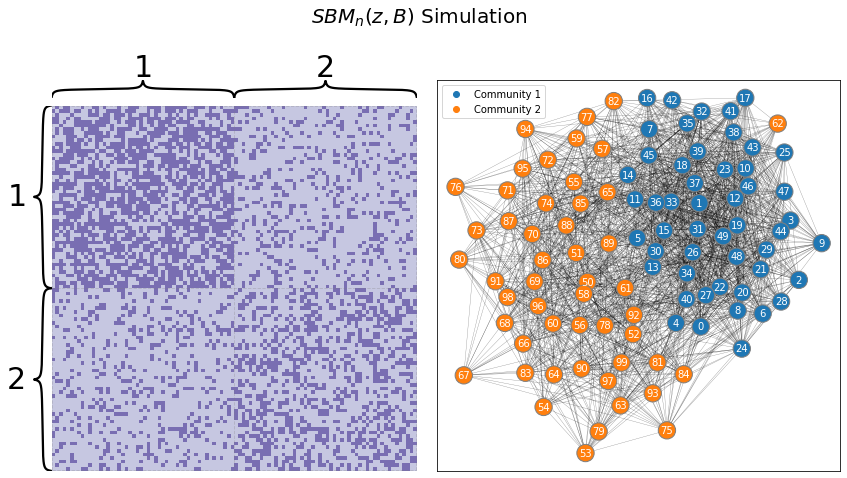

In [5]:
from graspologic.simulations import sbm
from graphbook_code import draw_multiplot
import pandas as pd

# sample a graph from SBM_{300}(tau, B)
A = sbm(n=[int(n/2), int(n/2)], p=B, directed=False, loops=False)
ys = [1 for i in range(0, 50)] + [2 for i in range(0, 50)]
draw_multiplot(A, labels=ys, title="$SBM_n(z, B)$ Simulation");

The above network shows students, ordered by the school they are in (first school and the second school, respectively). As we can see in the above network, people from the first school are more connected than people from school $2$. Also, the connections between people from different schools (the *off-diagonal* blocks of the adjacency matrix, the lower left and upper right blocks) appear to be a bit *more sparse* (fewer edges) than connections betwen schools (the *on-diagonal* blocks of the adjacency matrix, the upper left and lower right blocks). The above heatmap can be described as **modular**: it has clear communities. Remember that the connections for each node are indicated by a single row, or a single column, of the adjacency matrix. The first half of the rows have strong connections with the first half of the columns, which indicates that the first half of students tend to be better friends with other students in the first half. We can duplicate this argument for the second half of students ot see that it seems reasonable to conclude that there are two communities of students here.

Something easy to mistake about a realization of an $SBM_n(\vec z, B)$ is that the realizations will *not always* have the obvious modular structure we can see above when we look at a heatmap. Rather, this modular structure is *only* made obvious because the students are ordered according to the school in which they are in. What do you think will happen if we look at the students in a random order? Do you think that he structure that exists in this network will be obvious?

The answer is: *No!* Let's see what happens when we reorder the nodes from the network into a random order, and pretend we don't know the true community labels ahead of time:

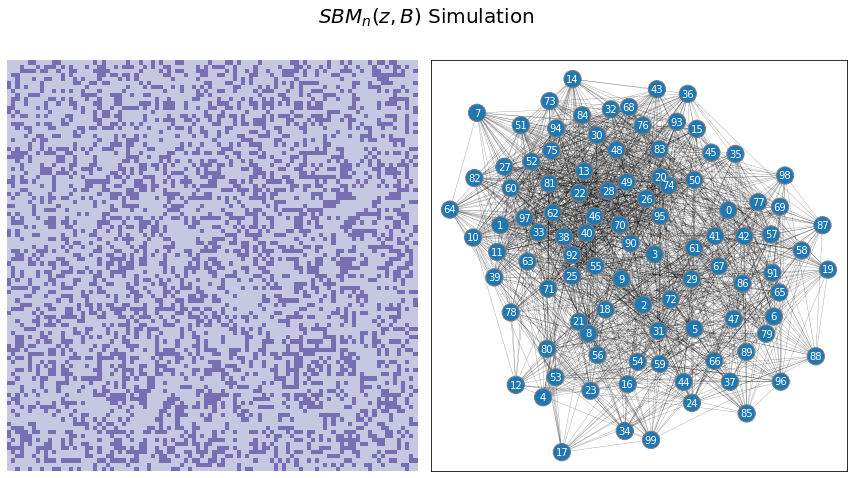

In [6]:
import numpy as np

# generate a reordering of the n nodes
vtx_perm = np.random.choice(n, size=n, replace=False)

Aperm = A[tuple([vtx_perm])] [:,vtx_perm]
yperm = np.array(ys)[vtx_perm]
draw_multiplot(Aperm, title="$SBM_n(z, B)$ Simulation");

Now, the students are *not* organized according to school, because they have been randomly reordered. It becomes pretty tough to figure out whether there are communities just by looking at an adjacency matrix, unless you are looking at a network in which the nodes are *already arranged* in an order which respects the community structure. By an *order that respects the community structure*, we mean that the community assignment vector $\vec z$ is arranged so that all of the nodes in the first community come first, followed by all of the nodes in the second community, followed by all of the nodes in the third community, so on and so forth up to the nodes of the community $K$.

In practice, this means that if you know ahead of time what natural groupings of the nodes might be (such as knowing which school each student goes to) by way of your node attributes, you can visualize your data according to that grouping. If you don't know anything about natural groupings of nodes, however, we are left with the problem of *estimating community structure*. A later method, called the *spectral embedding*, will be paired with clustering techniques to allow us to estimate node assignment vectors.